<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [37]:
boston_df['AGE'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64>

Plot1: For the "Median value of owner-occupied homes" provide a boxplot

Plot2: Provide a  bar plot for the Charles river variable

Plot3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Plot4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Plot5: Create a histogram for the pupil to teacher ratio variable

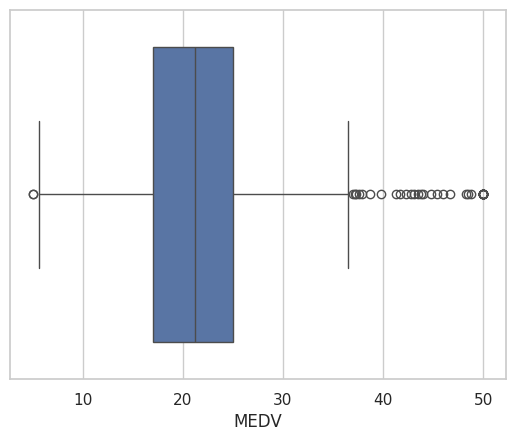

In [12]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.show()

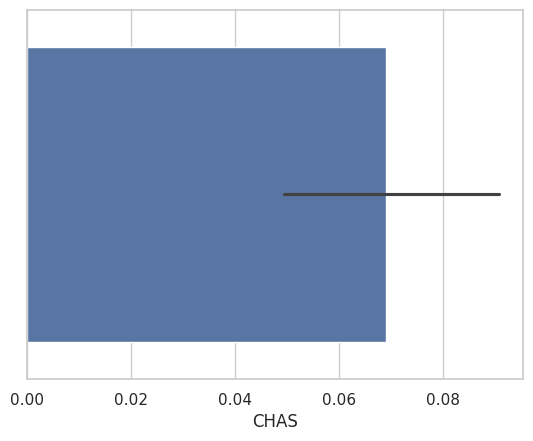

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", data=boston_df)
plt.show()

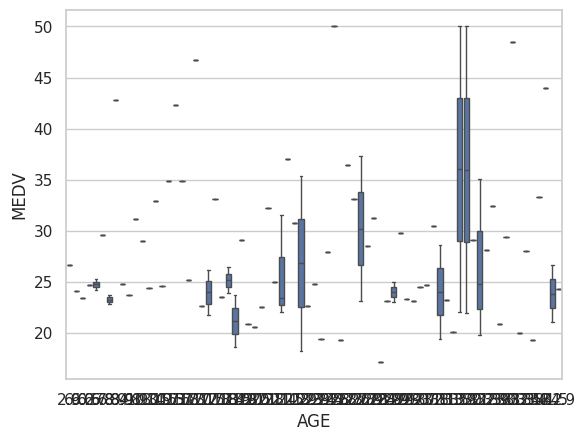

In [75]:
d1 = boston_df[(boston_df['AGE'] <= 35)]['AGE'] #= '35 years and younger'
#d1 = boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] #= '35 years and younger'
d2 = boston_df[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70)]['AGE']
d3 = boston_df.loc[(boston_df['AGE'] >= 70)]['AGE']

ax = sns.boxplot(x=d1, y='MEDV', data=boston_df)
plt.show()

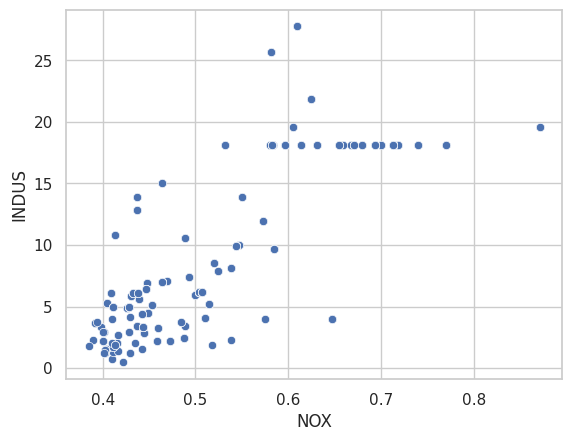

In [23]:
ax = sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
plt.show()

THe plots show that the high correlation exists at lower values and the it decreases with higher values

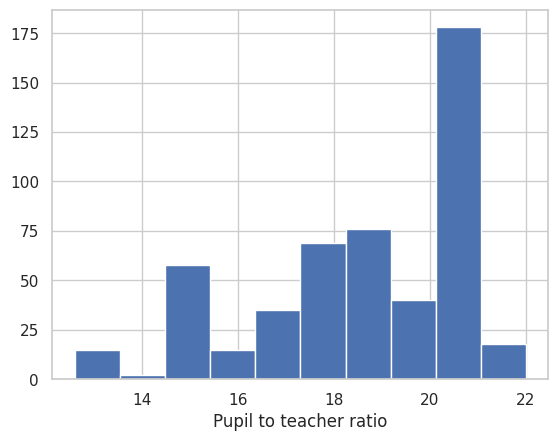

In [27]:
plt.hist(x='PTRATIO',data=boston_df)
plt.xlabel('Pupil to teacher ratio')
plt.show()

2a) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2b) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

2c) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

2d) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


# 2a)
State the hypothesis

*   $H\_0:$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1:$ ("there is a difference in median value of houses bounded by the Charles river")


<ipython-input-33-e786db4953d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

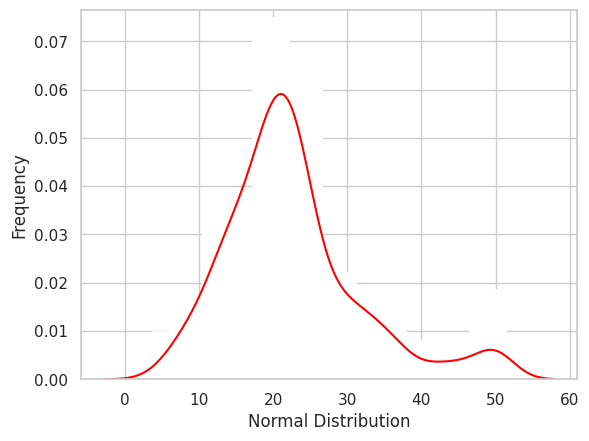

In [33]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [77]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == '0']['MEDV'],
                   boston_df[boston_df['CHAS'] == '1']['MEDV'], center='mean')


LeveneResult(statistic=nan, pvalue=nan)

In [34]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '0']['MEDV'],
                   boston_df[boston_df['CHAS'] == '1']['MEDV'], equal_var = True)

TtestResult(statistic=nan, pvalue=nan, df=nan)

# 2b)Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0:$ ("there is no difference in median value of houses and AGE ")
*   $H\_1:$ ("there is a difference in median value of houses and AGE")


In [40]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [42]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [43]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [44]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


# 2c)Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
State the hypothesis

*   $H\_0:$ ("there is no correlation in NOX and INDUS ")
*   $H\_1:$ ("there is a difference in NOX and INDUS")


In [46]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.91e-98
Time:                        12:35:00   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, there is correlation between the two quantities

# 2d) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0:$ ("there is no correlation in DIS and MEDV ")
*   $H\_1:$ ("there is a difference in DIS and MEDV")


In [49]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        12:38:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""